# Visualization Lecture

This notebook contains the code for generating the data and the plots found in 

In [74]:
import math
import random
import string
import warnings
warnings.filterwarnings('ignore')

import pandas
from plotnine import *
import numpy as np

**Read in data from [Zenodo](https://zenodo.org/record/2529117/files/limma-voom_luminalpregnant-luminallactate)**

In [30]:
dataframe = pandas.read_csv('volcano_data.tsv', sep='\t')
dataframe['neg_log_p_val'] = -np.log(dataframe['adj.P.Val'])

In [31]:
dataframe.head()

,ENTREZID,SYMBOL,GENENAME,logFC,AveExpr,t,P.Value,adj.P.Val,neg_log_p_val,significant
0,12992,Csn1s2b,casein alpha s2-like B,-8.603611,3.562950,-43.796498,3.830650e-15,6.053959e-11,23.527724,True
1,13358,Slc25a1,solute carrier family 25 (mitochondrial carrie...,-4.124175,5.779699,-29.907849,1.758595e-13,1.389642e-09,20.394220,True
2,11941,Atp2b2,"ATPase, Ca++ transporting, plasma membrane 2",-7.386986,1.282143,-27.819499,4.836363e-13,2.432800e-09,19.834223,True
3,20531,Slc34a2,"solute carrier family 34 (sodium phosphate), m...",-4.177812,4.278629,-27.072723,6.157428e-13,2.432800e-09,19.834223,True
4,100705,Acacb,acetyl-Coenzyme A carboxylase beta,-4.314320,4.440914,-25.223566,1.499977e-12,4.741129e-09,19.166991,True


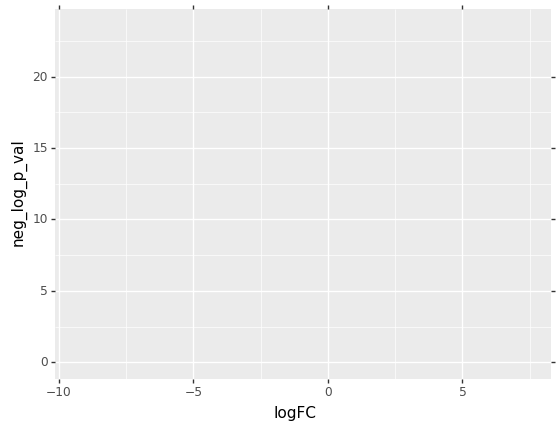

<ggplot: (-9223363293037477856)>

In [32]:
ggplot(dataframe, aes(x='logFC', y='neg_log_p_val'))

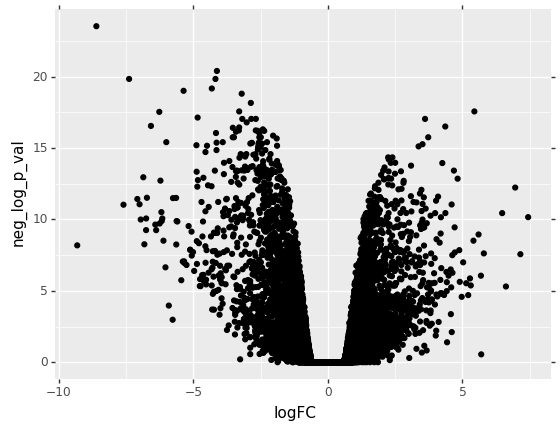

<ggplot: (8743820914906)>

In [52]:
ggplot(dataframe, aes(x='logFC', y='neg_log_p_val')) + geom_point()

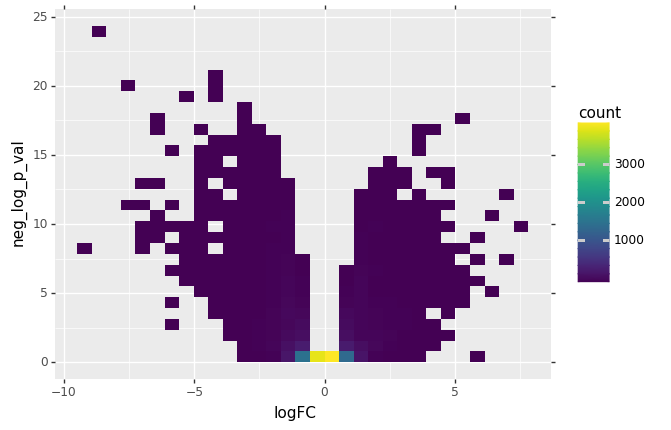

<ggplot: (8743816637974)>

In [35]:
ggplot(dataframe, aes(x='logFC', y='neg_log_p_val')) + geom_bin2d()

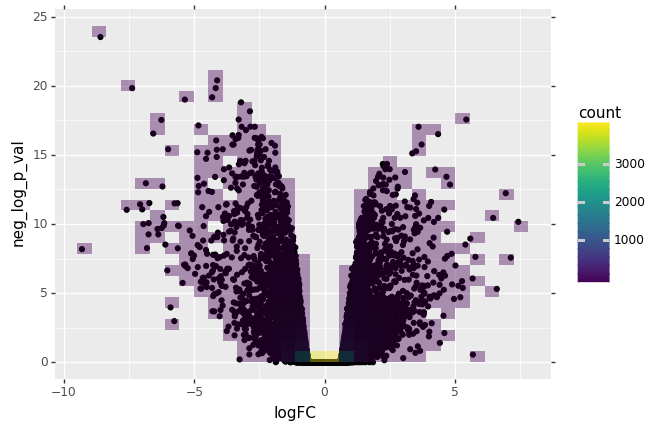

<ggplot: (-9223363293038258302)>

In [36]:
ggplot(dataframe, aes(x='logFC', y='neg_log_p_val')) 
+ geom_point() 
+ geom_bin2d(alpha=.4)

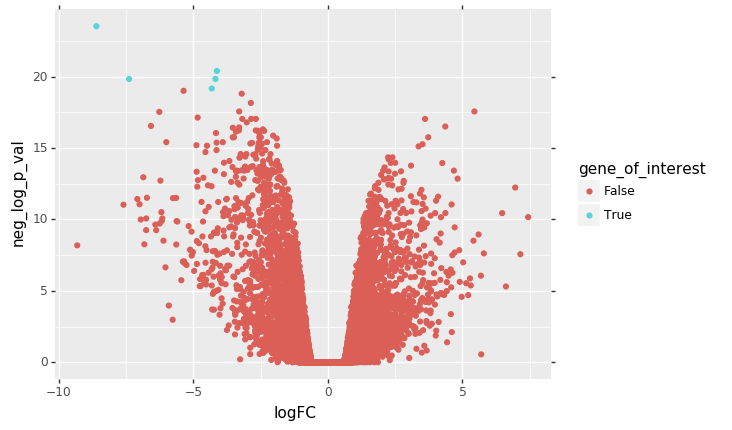

<ggplot: (8743817215580)>

In [51]:
genes_of_interest = ['Csn1s2b', 'Slc25a1', 'Atp2b2', 'Slc34a2', 'Acacb']

dataframe['gene_of_interest'] = dataframe['SYMBOL'].isin(genes_of_interest)

ggplot(dataframe, aes(x='logFC', y='neg_log_p_val')) + geom_point(aes(color='gene_of_interest'))

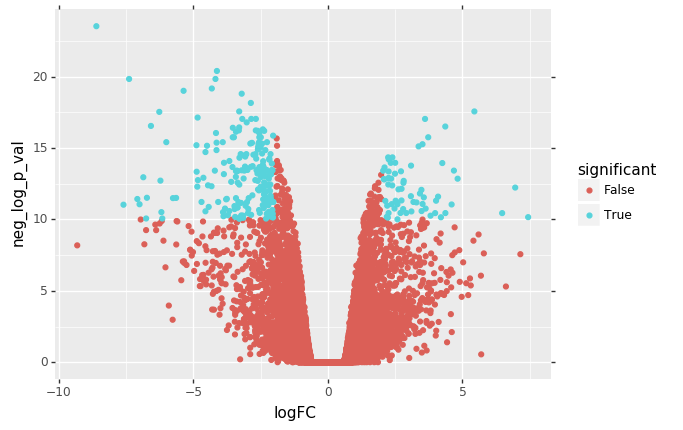

<ggplot: (8743815829203)>

In [47]:
condition1 = dataframe['neg_log_p_val'] >= 10
condition2 = abs(dataframe['logFC']) > 2
dataframe['significant'] = condition1 & condition2

ggplot(dataframe, aes(x='logFC', y='neg_log_p_val')) + geom_point(aes(color='significant'))

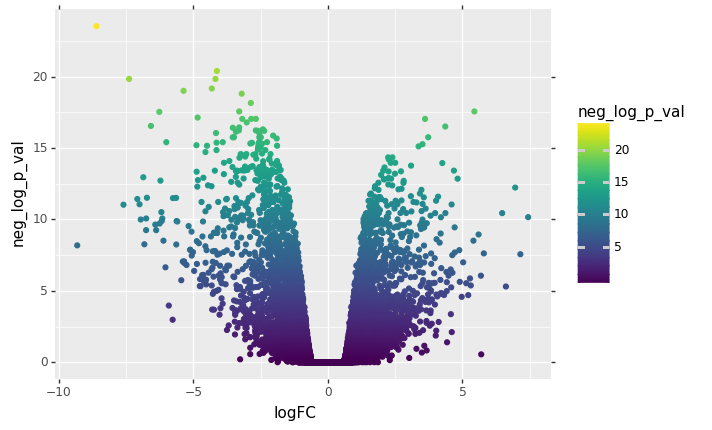

<ggplot: (8743816790059)>

In [54]:
ggplot(dataframe, aes(x='logFC', y='neg_log_p_val')) 
+ geom_point(aes(color='neg_log_p_val'))

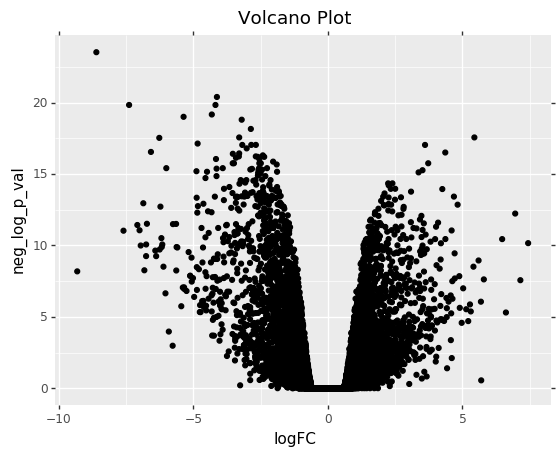

<ggplot: (-9223363293038152325)>

In [60]:
ggplot(dataframe, aes(x='logFC', y='neg_log_p_val')) \
+ geom_point()\
+ ggtitle('Volcano Plot')

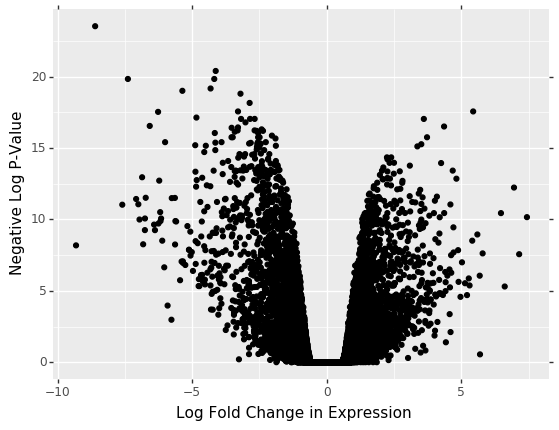

<ggplot: (8743816537885)>

In [61]:
ggplot(dataframe, aes(x='logFC', y='neg_log_p_val')) \
+ geom_point()\
+ xlab('Log Fold Change in Expression')\
+ ylab('Negative Log P-Value')

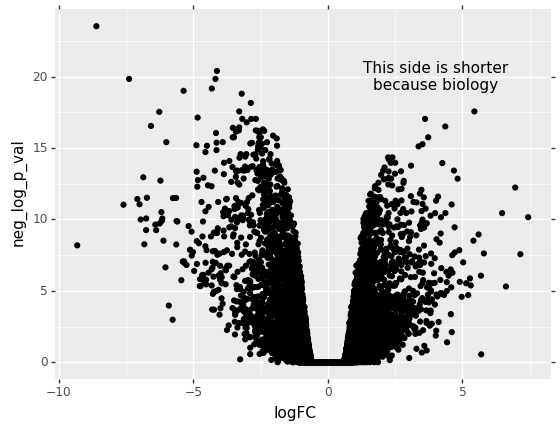

<ggplot: (8743804473608)>

In [67]:
ggplot(dataframe, aes(x='logFC', y='neg_log_p_val', label='SYMBOL')) \
+ geom_point()\
+ annotate("text", x = 4, y = 20, label = "This side is shorter\nbecause biology")

In [52]:
neg_control = np.random.normal(size=40) + 10
pos_control = np.random.normal(size=40) + 15
experiment = np.random.normal(size=40) + 14


data = {'neg_control': neg_control, 'pos_control': pos_control, 'experiment': experiment}
bar_df = pandas.DataFrame(data)
bar_df

,neg_control,pos_control,experiment
0,10.573405,15.795453,12.646862
1,10.266933,14.978045,12.372353
2,8.398704,14.365767,12.897853
3,9.794511,15.033012,14.688481
4,8.888123,15.898007,14.364093
5,10.922777,15.068970,13.796176
6,8.511950,15.823334,12.936430
7,10.858479,14.711676,14.798542
8,11.251270,15.064859,13.516137
9,9.630579,13.538197,15.422230


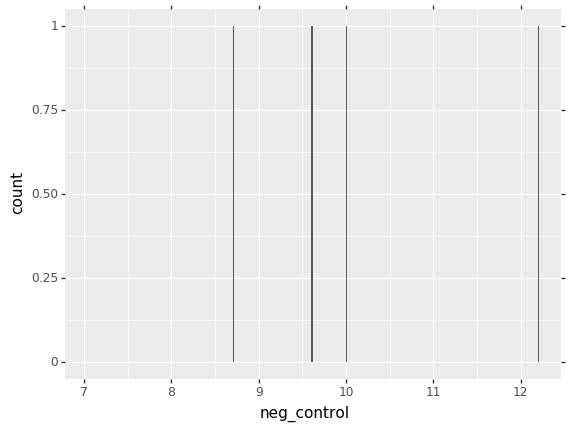

<ggplot: (-9223363272106441079)>

In [53]:
ggplot(bar_df, aes(x='neg_control')) + geom_bar()

In [54]:
# We need the column names to be their own column, so we use the melt command

bar_df = pandas.melt(bar_df)
bar_df.head()

,variable,value
0,neg_control,10.573405
1,neg_control,10.266933
2,neg_control,8.398704
3,neg_control,9.794511
4,neg_control,8.888123


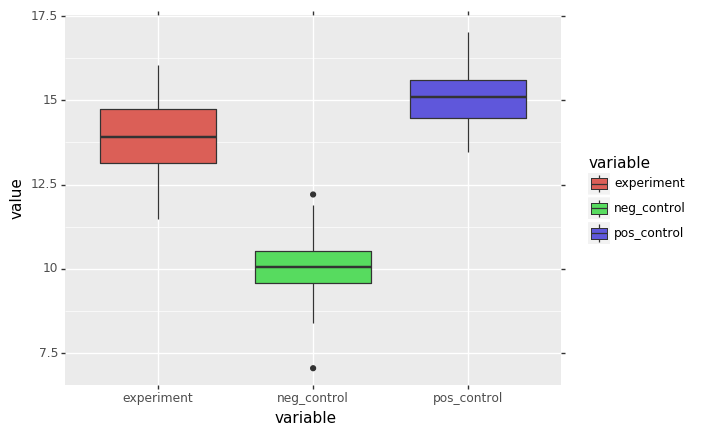

<ggplot: (8764749076295)>

In [55]:
(ggplot(bar_df, aes(x='variable', y='value', fill='variable')) 
+ geom_boxplot())

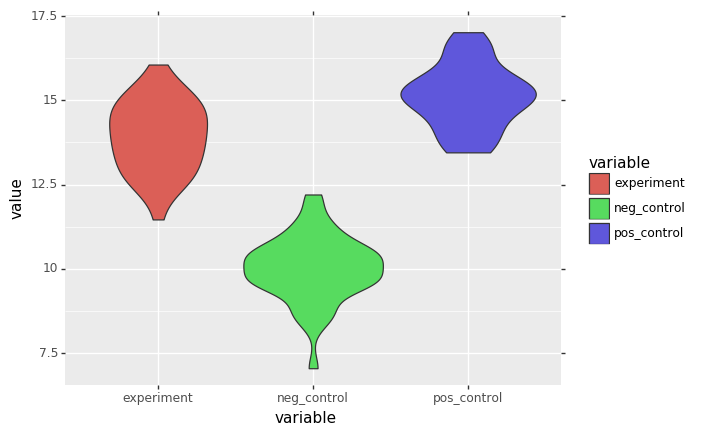

<ggplot: (-9223363272104814069)>

In [56]:
ggplot(bar_df, aes(x='variable', y='value', fill='variable'))\
+ geom_violin()

In [64]:
# Set the x range to be [0, 10)
scatter_x = np.random.random(30) * 10
# Give the line a slope of 3 and a y-intercept of 4
scatter_y = scatter_x * 3 + 4
# Add noise
scatter_y += np.random.normal(size=30) * 4

scatter_df = pandas.DataFrame({'x': scatter_x, 'y': scatter_y})
scatter_df.head()

,x,y
0,6.093203,17.641677
1,8.130753,17.058442
2,4.148132,17.610860
3,2.908058,10.700783
4,2.890335,11.470002


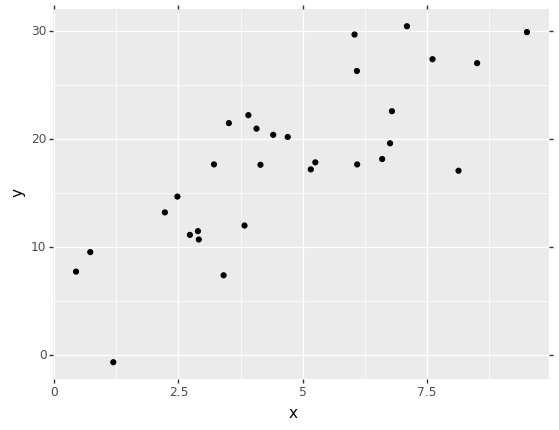

<ggplot: (-9223363272106537065)>

In [65]:
ggplot(scatter_df, aes(x='x', y='y')) \
+ geom_point()

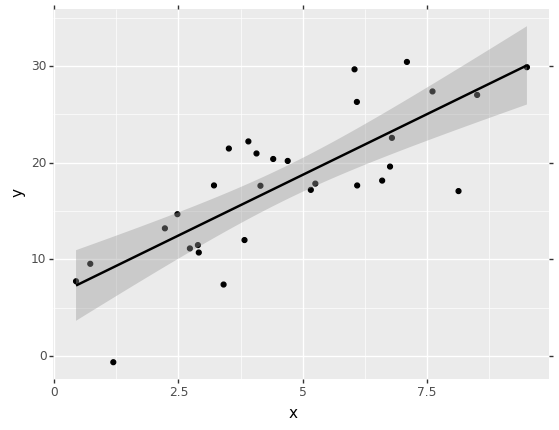

<ggplot: (8764748199267)>

In [66]:
ggplot(scatter_df, aes(x='x', y='y'))\
+ geom_point()\
+ geom_smooth(method='lm')

In [99]:
num_genes = 30
genes = []
for i in range(num_genes):
    gene_base = ''.join([random.choice(string.ascii_uppercase) for _ in range(3)])
    genes.append(gene_base + str(random.choice([0,1,2,3,4])))

case_1 = np.random.normal(size=num_genes) + 1.5
case_2 = np.random.normal(size=num_genes) + 1.7
case_3 = np.random.normal(size=num_genes) + 1.6
control_1 = np.random.normal(size=num_genes)
control_2 = np.random.normal(size=num_genes)

    
heatmap_df = pandas.DataFrame({'genes': genes, 'case_1': case_1, 'case_2':case_2,
                               'case_3': case_3, 'control_1': control_1, 'control_2': control_2})

heatmap_df = heatmap_df.melt(id_vars=['genes'])
heatmap_df = heatmap_df.rename(columns={'variable': 'experiment', 'value': 'expression'})
heatmap_df.head()

,genes,experiment,expression
0,WNO2,case_1,1.050926
1,NLT0,case_1,0.826808
2,RJM2,case_1,2.507592
3,EEQ2,case_1,2.911344
4,GLF0,case_1,1.611909


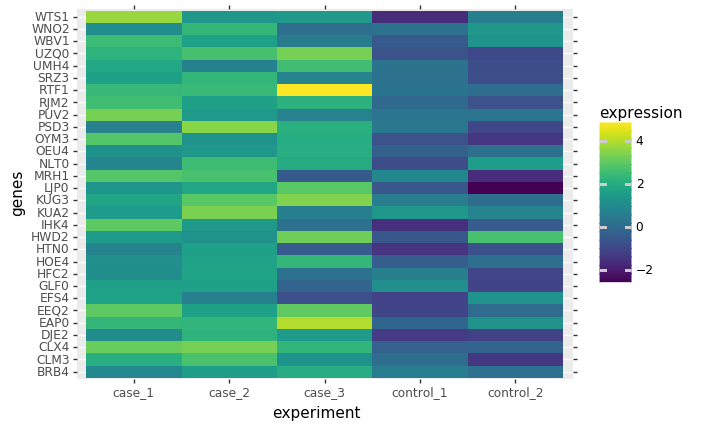

<ggplot: (-9223363272104810773)>

In [100]:
ggplot(heatmap_df, aes(x='experiment', y='genes'))\
+ geom_tile(aes(fill='expression'))\

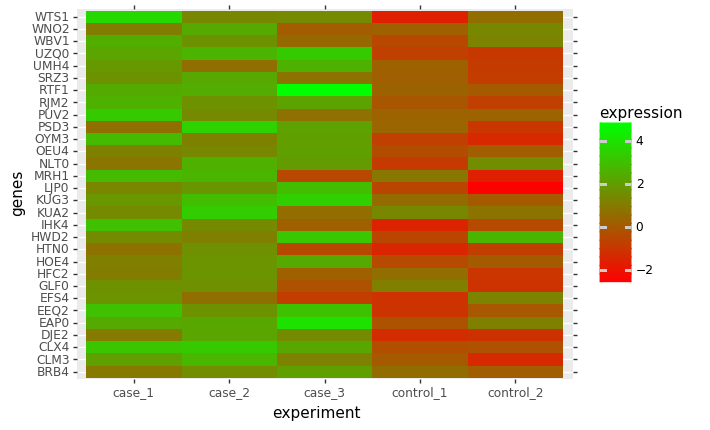

<ggplot: (-9223363272104810815)>

In [101]:
ggplot(heatmap_df, aes(x='experiment', y='genes'))\
+ geom_tile(aes(fill='expression'))\
+ scale_fill_gradient(low='red', high='lime')

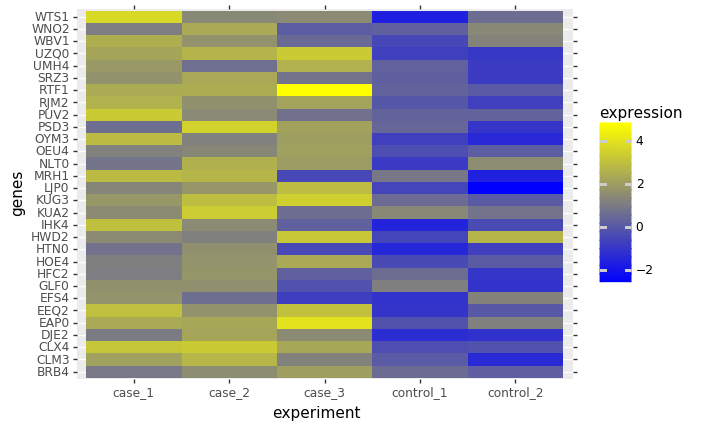

<ggplot: (8764748272648)>

In [102]:
ggplot(heatmap_df, aes(x='experiment', y='genes'))\
+ geom_tile(aes(fill='expression'))\
+ scale_fill_gradient(low='blue', high='yellow')